In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ihsgstockdata/DaftarSaham.csv
/kaggle/input/ihsgstockdata/minutes/MAPB.csv
/kaggle/input/ihsgstockdata/minutes/SIPD.csv
/kaggle/input/ihsgstockdata/minutes/ROTI.csv
/kaggle/input/ihsgstockdata/minutes/MBTO.csv
/kaggle/input/ihsgstockdata/minutes/SURE.csv
/kaggle/input/ihsgstockdata/minutes/IFII.csv
/kaggle/input/ihsgstockdata/minutes/CPIN.csv
/kaggle/input/ihsgstockdata/minutes/NASA.csv
/kaggle/input/ihsgstockdata/minutes/HAIS.csv
/kaggle/input/ihsgstockdata/minutes/MCOR.csv
/kaggle/input/ihsgstockdata/minutes/TFCO.csv
/kaggle/input/ihsgstockdata/minutes/DEWI.csv
/kaggle/input/ihsgstockdata/minutes/MLPL.csv
/kaggle/input/ihsgstockdata/minutes/KOTA.csv
/kaggle/input/ihsgstockdata/minutes/ADRO.csv
/kaggle/input/ihsgstockdata/minutes/ECII.csv
/kaggle/input/ihsgstockdata/minutes/MEDS.csv
/kaggle/input/ihsgstockdata/minutes/BINO.csv
/kaggle/input/ihsgstockdata/minutes/ISSP.csv
/kaggle/input/ihsgstockdata/minutes/TALF.csv
/kaggle/input/ihsgstockdata/minutes/YULE.csv
/kaggle/inp

# Import and Cleansing Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_daily = pd.read_csv('/kaggle/input/ihsgstockdata/daily/ANTM.csv')
df_daily

,timestamp,open,low,high,close,volume
0,2001-04-16,432,407,436,432,0
1,2001-04-17,432,407,436,432,0
2,2001-04-18,432,407,436,432,0
3,2001-04-19,432,407,436,432,0
4,2001-04-20,432,407,436,432,0
...,...,...,...,...,...,...
5665,2023-01-02,1990,1975,2010,1980,15045200
5666,2023-01-03,1980,1975,2020,2000,45001200
5667,2023-01-04,2020,2010,2100,2050,142169900
5668,2023-01-05,2020,1935,2050,1965,130118600


In [4]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5670 non-null   object
 1   open       5670 non-null   int64 
 2   low        5670 non-null   int64 
 3   high       5670 non-null   int64 
 4   close      5670 non-null   int64 
 5   volume     5670 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 265.9+ KB


In [5]:
df_hourly = pd.read_csv('/kaggle/input/ihsgstockdata/hourly/ANTM.csv')
df_hourly

,timestamp,open,low,high,close,volume
0,2020-04-16 09:00:00,535,505,535,505,0
1,2020-04-16 10:00:00,510,498,515,498,17719200
2,2020-04-16 11:00:00,498,494,500,496,11856600
3,2020-04-16 12:00:00,498,494,500,496,0
4,2020-04-16 13:00:00,496,496,510,498,17439300
...,...,...,...,...,...,...
5677,2023-01-06 11:00:00,1985,1975,1985,1985,2152900
5678,2023-01-06 12:00:00,0,0,0,0,0
5679,2023-01-06 13:00:00,1985,1965,1985,1965,4745900
5680,2023-01-06 14:00:00,1965,1965,1985,1980,10364800


In [6]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  5682 non-null   object
 1   open       5682 non-null   int64 
 2   low        5682 non-null   int64 
 3   high       5682 non-null   int64 
 4   close      5682 non-null   int64 
 5   volume     5682 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 266.5+ KB


In [7]:
df_minutes = pd.read_csv('/kaggle/input/ihsgstockdata/minutes/ANTM.csv')
df_minutes

,timestamp,open,low,high,close,volume
0,2021-11-01 09:00:00,2360,2350,2360,2360,558400
1,2021-11-01 09:01:00,2360,2350,2360,2350,506000
2,2021-11-01 09:02:00,2350,2340,2360,2340,115700
3,2021-11-01 09:03:00,2350,2340,2350,2350,171300
4,2021-11-01 09:04:00,2350,2340,2350,2350,188000
...,...,...,...,...,...,...
130216,2023-01-06 15:55:00,0,0,0,0,0
130217,2023-01-06 15:56:00,0,0,0,0,0
130218,2023-01-06 15:57:00,0,0,0,0,0
130219,2023-01-06 15:58:00,0,0,0,0,0


In [8]:
df_minutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130221 entries, 0 to 130220
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  130221 non-null  object
 1   open       130221 non-null  int64 
 2   low        130221 non-null  int64 
 3   high       130221 non-null  int64 
 4   close      130221 non-null  int64 
 5   volume     130221 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 6.0+ MB


In [9]:
df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'])
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5670 non-null   datetime64[ns]
 1   open       5670 non-null   int64         
 2   low        5670 non-null   int64         
 3   high       5670 non-null   int64         
 4   close      5670 non-null   int64         
 5   volume     5670 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 265.9 KB


In [10]:
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  5682 non-null   datetime64[ns]
 1   open       5682 non-null   int64         
 2   low        5682 non-null   int64         
 3   high       5682 non-null   int64         
 4   close      5682 non-null   int64         
 5   volume     5682 non-null   int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 266.5 KB


In [11]:
df_minutes['timestamp'] = pd.to_datetime(df_minutes['timestamp'])
df_minutes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130221 entries, 0 to 130220
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   timestamp  130221 non-null  datetime64[ns]
 1   open       130221 non-null  int64         
 2   low        130221 non-null  int64         
 3   high       130221 non-null  int64         
 4   close      130221 non-null  int64         
 5   volume     130221 non-null  int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 6.0 MB


In [12]:
print(f'Describe of Each : \n Daily \n {df_daily.describe()}\n, Hourly \n{df_hourly.describe()}\n, Minutes \n{df_minutes.describe()}')

Describe of Each : 
 Daily 
               open          low         high        close        volume
count  5670.000000  5670.000000  5670.000000  5670.000000  5.670000e+03
mean   1147.170547  1122.435273  1167.470194  1145.959083  5.842432e+07
std     738.496408   725.853779   753.857710   737.559545  1.242240e+08
min     290.000000   285.000000   294.000000   287.000000  0.000000e+00
25%     500.000000   491.000000   510.000000   499.250000  0.000000e+00
50%     895.000000   881.000000   910.000000   895.000000  2.258961e+07
75%    1679.000000  1654.000000  1700.000000  1679.000000  6.600675e+07
max    4409.000000  4115.000000  4451.000000  4241.000000  2.186653e+09
, Hourly 
              open          low         high        close        volume
count  5682.000000  5682.000000  5682.000000  5682.000000  5.682000e+03
mean   1900.249384  1888.733897  1910.956177  1898.960577  2.282031e+07
std     708.406271   704.952439   712.859556   709.026145  5.763197e+07
min       0.000000     0.

In [13]:
print(df_daily.isnull().sum())
print(df_hourly.isnull().sum())
print(df_minutes.isnull().sum())

timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64
timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64
timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64


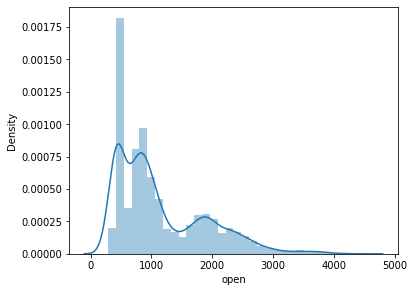

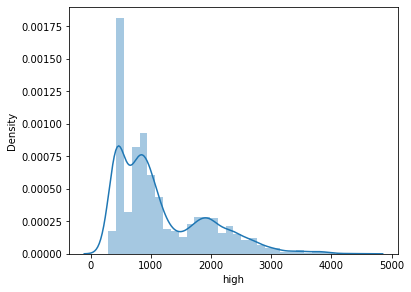

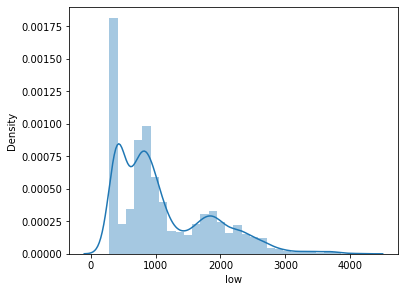

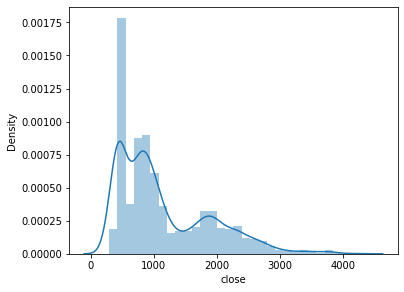

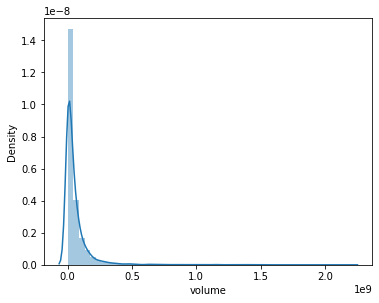

In [14]:
features = ['open', 'high', 'low', 'close', 'volume']

# plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplots(figsize=(20,10))
    plt.subplot(2,3,i+1)
    sns.distplot(df_daily[col])
    plt.show()

In [15]:
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df_daily['timestamp'],
                open=df_daily['open'],
                high=df_daily['high'],
                low=df_daily['low'],
                close=df_daily['close'])])

fig.show()

Disini saya akan menggunakan data pergerakan harga saham harian untuk memprediksi jangka menengah dengan begitu dataset hourly dan minutes akan saya hilangkan

In [16]:
df = df_daily
df

,timestamp,open,low,high,close,volume
0,2001-04-16,432,407,436,432,0
1,2001-04-17,432,407,436,432,0
2,2001-04-18,432,407,436,432,0
3,2001-04-19,432,407,436,432,0
4,2001-04-20,432,407,436,432,0
...,...,...,...,...,...,...
5665,2023-01-02,1990,1975,2010,1980,15045200
5666,2023-01-03,1980,1975,2020,2000,45001200
5667,2023-01-04,2020,2010,2100,2050,142169900
5668,2023-01-05,2020,1935,2050,1965,130118600


In [17]:
df_daily.describe()

,open,low,high,close,volume
count,5670.000000,5670.000000,5670.000000,5670.000000,5.670000e+03
mean,1147.170547,1122.435273,1167.470194,1145.959083,5.842432e+07
std,738.496408,725.853779,753.857710,737.559545,1.242240e+08
min,290.000000,285.000000,294.000000,287.000000,0.000000e+00
25%,500.000000,491.000000,510.000000,499.250000,0.000000e+00
50%,895.000000,881.000000,910.000000,895.000000,2.258961e+07
75%,1679.000000,1654.000000,1700.000000,1679.000000,6.600675e+07
max,4409.000000,4115.000000,4451.000000,4241.000000,2.186653e+09


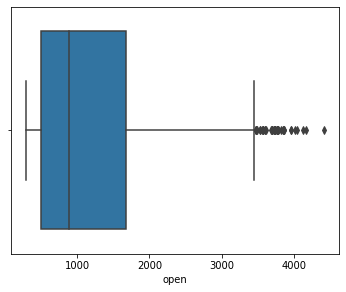

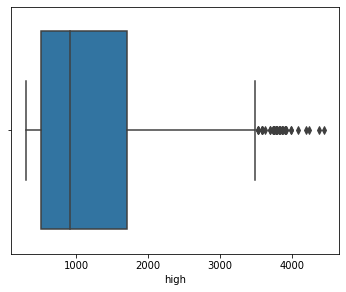

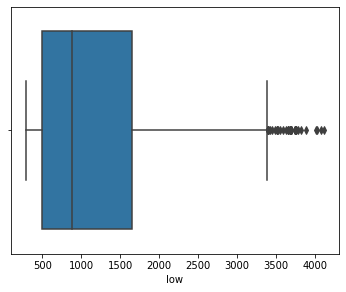

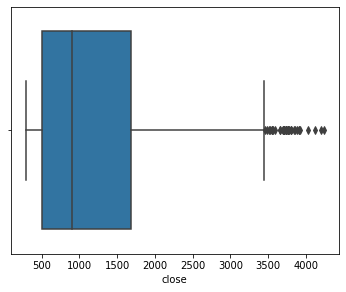

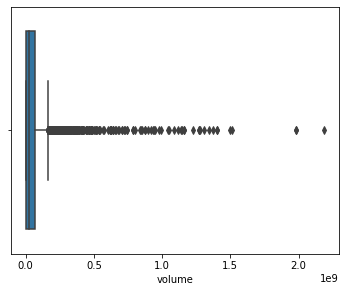

In [18]:
for i, col in enumerate(features):
    plt.subplots(figsize=(20,10))
    plt.subplot(2,3,i+1)
    sns.boxplot(df_daily[col])
    plt.show()

In [19]:
df['timestamp']

0      2001-04-16
1      2001-04-17
2      2001-04-18
3      2001-04-19
4      2001-04-20
          ...    
5665   2023-01-02
5666   2023-01-03
5667   2023-01-04
5668   2023-01-05
5669   2023-01-06
Name: timestamp, Length: 5670, dtype: datetime64[ns]

# Feature Engineering

In [20]:
# Create new columns
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df

,timestamp,open,low,high,close,volume,day,month,year
0,2001-04-16,432,407,436,432,0,16,4,2001
1,2001-04-17,432,407,436,432,0,17,4,2001
2,2001-04-18,432,407,436,432,0,18,4,2001
3,2001-04-19,432,407,436,432,0,19,4,2001
4,2001-04-20,432,407,436,432,0,20,4,2001
...,...,...,...,...,...,...,...,...,...
5665,2023-01-02,1990,1975,2010,1980,15045200,2,1,2023
5666,2023-01-03,1980,1975,2020,2000,45001200,3,1,2023
5667,2023-01-04,2020,2010,2100,2050,142169900,4,1,2023
5668,2023-01-05,2020,1935,2050,1965,130118600,5,1,2023


In [21]:
# menampilkan keterangan apakah harga tersebut berada di akhir kuartal atau tidak
# 1 = True
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end
0,2001-04-16,432,407,436,432,0,16,4,2001,0
1,2001-04-17,432,407,436,432,0,17,4,2001,0
2,2001-04-18,432,407,436,432,0,18,4,2001,0
3,2001-04-19,432,407,436,432,0,19,4,2001,0
4,2001-04-20,432,407,436,432,0,20,4,2001,0


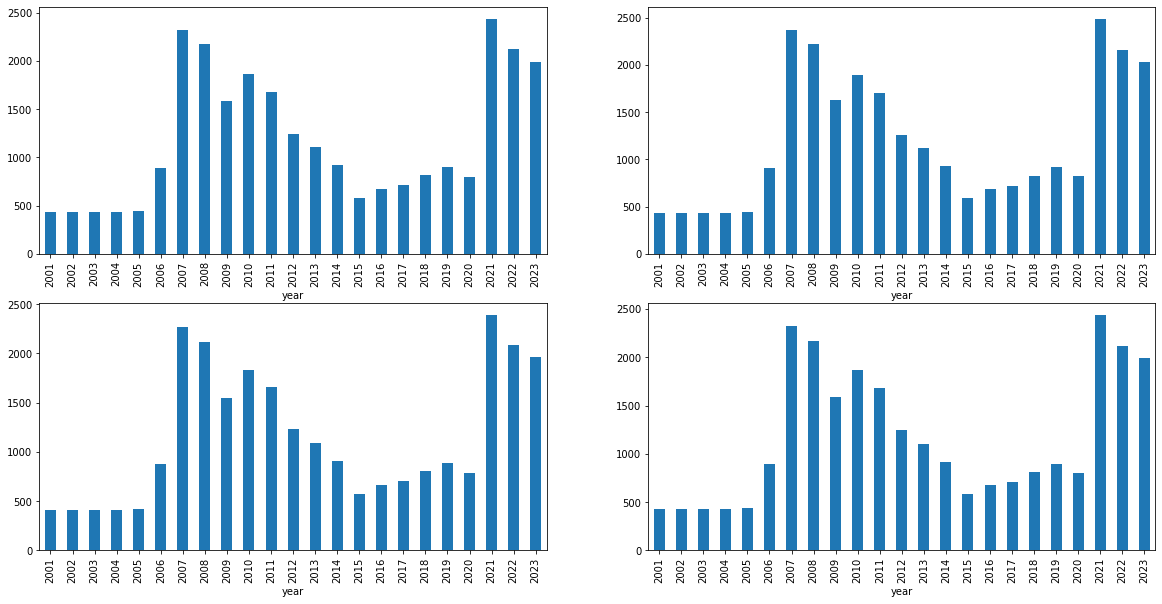

In [22]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['open', 'high', 'low', 'close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [23]:
df.groupby('is_quarter_end').mean()

,open,low,high,close,volume,day,month,year
is_quarter_end,,,,,,,,
0,1150.708686,1125.742585,1171.669227,1149.786811,6.192455e+07,15.728814,6.084216,2011.644597
1,1140.116684,1115.841605,1159.098733,1138.327878,5.144603e+07,15.755016,7.552270,2011.654699


Dari tabel diatas dapat dilihat bahwa harga saham ANTM cenderung menurun setelah pengumuman laporan kuartal. Juga terdapat kondisi yang sama pada jumlah volume transaksi.

In [24]:
df['open-close'] = df['open'] - df['close']
df['low-high'] = df['low'] - df['high']
df['target'] = np.where(df['close'].shift(-1) > df['close'], 1, 0)
df

,timestamp,open,low,high,close,volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2001-04-16,432,407,436,432,0,16,4,2001,0,0,-29,0
1,2001-04-17,432,407,436,432,0,17,4,2001,0,0,-29,0
2,2001-04-18,432,407,436,432,0,18,4,2001,0,0,-29,0
3,2001-04-19,432,407,436,432,0,19,4,2001,0,0,-29,0
4,2001-04-20,432,407,436,432,0,20,4,2001,0,0,-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,2023-01-02,1990,1975,2010,1980,15045200,2,1,2023,0,10,-35,1
5666,2023-01-03,1980,1975,2020,2000,45001200,3,1,2023,0,-20,-45,1
5667,2023-01-04,2020,2010,2100,2050,142169900,4,1,2023,0,-30,-90,0
5668,2023-01-05,2020,1935,2050,1965,130118600,5,1,2023,0,55,-115,1


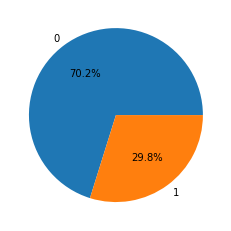

In [25]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

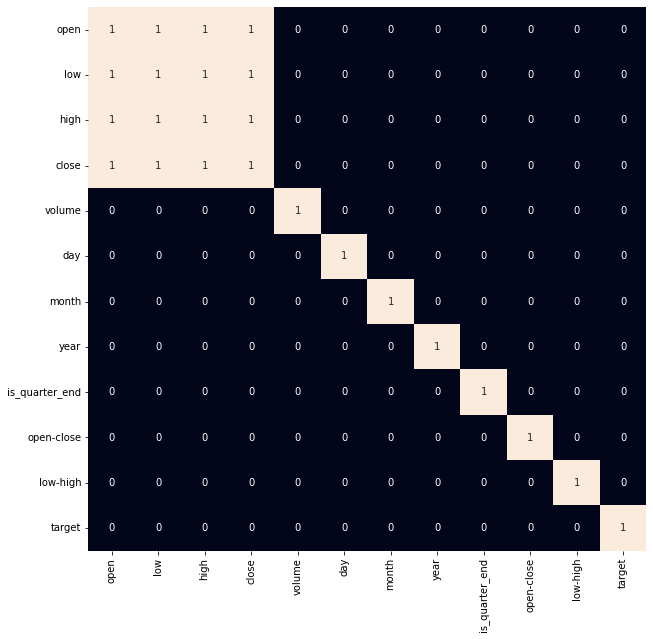

In [26]:
plt.figure(figsize=(10, 10))

# menampilkan hubungan korelasi antar kolom untuk menentukan fitur machine learning
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()


# Data Pre-Processing

In [27]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(5103, 3) (567, 3)


# Modelling

Disini kita melakukan training model machine learning (Logistic Regression, Support Vector Machine, XGBClassifier), dan kemudian akan dilihat kinerjanya berdasarkan data training dan validation sehingga akan terlihat model machine learning mana yang lebih baik untuk data tersebut.
Untuk evaluation metric, kita akan menggunakan kurva ROC-AUC dimana kurva ROC-AUC umumnya digunakan untuk mengukur akurasi prediksi.

In [28]:
models = [LogisticRegression(), SVC(
kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

print(f'{models[i]} : ')
print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
print()

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) : 
Training Accuracy :  0.8010851062970634
Validation Accuracy :  0.63890205956438



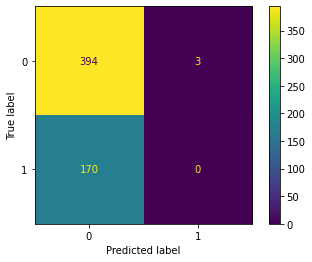

In [29]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

Dari hasil Training Accuracy dan Validation Accuracy menunjukan bahwa model mampu mengklasifikasikan data dengan baik atau mampu mengklasifikasikan data validasi sebanyak 66% dari keseluruhan data validasi yang digunakan dengan benar. Ini bisa menjadi indikasi bahwa model tersebut memiliki kinerja yang baik dalam mengklasifikasikan data baru yang sejenis dengan data yang digunakan untuk melatih model. 